In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
from scipy.io import wavfile
from collections import defaultdict, Counter
from scipy import signal
import numpy as np
import librosa
import random as rn
from keras.layers import Dense
from keras import Input
#from keras.engine import Model
from keras.layers import Dense, TimeDistributed, Dropout, Bidirectional, GRU, BatchNormalization, Activation, LeakyReLU, LSTM, Flatten, RepeatVector, Permute, Multiply, Conv2D, MaxPooling2D
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import keras
from keras import layers
from sklearn.preprocessing import MinMaxScaler

In [2]:
data_dir = 'C:/Users/USER/Desktop/spcup_2022/audiofile/'

In [3]:
X = []
Y = []
X_shape_list = []
categories = ["0","1","2","3","4"]
num_classes = len(categories)


for filename in os.listdir(f'C:/Users/USER/Desktop/spcup_2022/audiofile/'):
    audioname = f'C:/Users/USER/Desktop/spcup_2022/audiofile/{filename}'
    y, sr = librosa.load(audioname, duration=1, sr = 16000)  # 모두 1초까지만 자름
    stft = np.abs(librosa.stft(y, n_fft=512, hop_length=384))   # 일반적으로 1/4 가량 겹치게 함
    spectogram = np.abs(stft)
    #X_shape_second_index = spectogram[1].shape[0]  # 144 같은 shape의 두번째 인자 추출해서 저장
    #X_shape_list.append(X_shape_second_index)
    #X_flatten = np.ravel(spectogram, order='C')  # 1차원으로 flatten 함
    #spectogram = np.pad(X_flatten, (0,(600 - X_shape_second_index)*1025), constant_values=0)  # 가장 큰 두번째 인자의 수가 600 이었으므로 그것의 shape와 같아지도록 제로 패딩해줌
    #spectogram = np.reshape(spectogram,(1025,600))  # reshape
    scaler = MinMaxScaler()
    scaler.fit(spectogram)
    spectogram = scaler.transform(spectogram)
    X.append(spectogram)
    

for idex, category in enumerate(categories):
    label = [0 for i in range(num_classes)]
    label[idex] = 1
    for j in range(1000):
        Y.append(label)

X = np.array(X)
Y = np.array(Y)
print(X.shape)
print(Y.shape)

(5000, 257, 42)
(5000, 5)


In [4]:
X[0].shape, X[1].shape, X[318].shape

((257, 42), (257, 42), (257, 42))

In [5]:
X_train = np.concatenate((X[0:800],X[1000:1800],X[2000:2800],X[3000:3800],X[4000:4800]), axis = 0)
X_test = np.concatenate((X[800:1000],X[1800:2000],X[2800:3000],X[3800:4000],X[4800:5000]), axis = 0)
Y_train = np.concatenate((Y[0:800],Y[1000:1800],Y[2000:2800],Y[3000:3800],Y[4000:4800]), axis = 0)
Y_test = np.concatenate((Y[800:1000],Y[1800:2000],Y[2800:3000],Y[3800:4000],Y[4800:5000]), axis = 0)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4000, 257, 42)
(1000, 257, 42)
(4000, 5)
(1000, 5)


In [6]:
# CNN 모델에 들어가려면 4차원으로 바꿔줘야함
X_train = X_train.reshape(-1,257,42,1)
X_test = X_test.reshape(-1,257,42,1)

In [7]:
from keras.models import Sequential
from keras.layers import Flatten, Conv2D, MaxPooling2D

In [8]:
model = Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(257, 42, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dense(32, activation='relu'))
model.add(Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [9]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
classifier = model.fit(X_train,
                    Y_train,
                    epochs=10,
                    batch_size=64)

Epoch 1/10
63/63 [==============================] - 30s 463ms/step - loss: 0.5884 - accuracy: 0.7567
Epoch 2/10
63/63 [==============================] - 29s 458ms/step - loss: 0.2162 - accuracy: 0.9135
Epoch 3/10
63/63 [==============================] - 29s 456ms/step - loss: 0.1168 - accuracy: 0.9563
Epoch 4/10
63/63 [==============================] - 29s 459ms/step - loss: 0.0647 - accuracy: 0.9805
Epoch 5/10
63/63 [==============================] - 29s 455ms/step - loss: 0.0293 - accuracy: 0.9910
Epoch 6/10
63/63 [==============================] - 29s 459ms/step - loss: 0.0146 - accuracy: 0.9977
Epoch 7/10
63/63 [==============================] - 29s 456ms/step - loss: 0.0073 - accuracy: 0.9990
Epoch 8/10
63/63 [==============================] - 29s 458ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 9/10
63/63 [==============================] - 29s 460ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 10/10
63/63 [==============================] - 29s 457ms/step - loss: 7.0464e-04 - ac

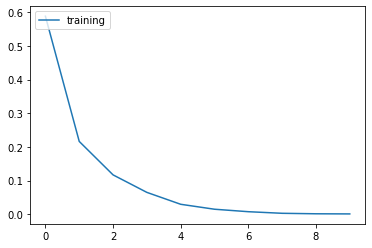

In [11]:
plt.plot(classifier.history['loss'])
#plt.plot(classifier.history['accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [12]:
test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)
print('테스트 정확도:', test_acc)

32/32 - 2s - loss: 0.2453 - accuracy: 0.9310 - 2s/epoch - 71ms/step
테스트 정확도: 0.9309999942779541


In [13]:
prediction = model.predict(X_test)

In [14]:
predicted_classes = np.argmax(prediction, axis = 1)
print(predicted_classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 2 1 1 1 1 1 2 2 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 2 2 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 2 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 2 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 3 1 1 1 1 1 1 1 3 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 3 2 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2 2 2
 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 1 2 2 2
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 1 

In [15]:
labels = np.argmax(Y_test, axis=1)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

In [17]:
labels.shape, predicted_classes.shape

((1000,), (1000,))

In [23]:
print(np.where(predicted_classes[0] != labels[0]))

(array([], dtype=int64),)


In [34]:
index = np.where(predicted_classes != labels)
print(index)

(array([ 74, 202, 205, 211, 212, 217, 231, 244, 249, 251, 252, 263, 267,
       270, 272, 283, 288, 290, 303, 308, 317, 319, 327, 328, 345, 346,
       357, 369, 382, 389, 400, 403, 411, 428, 433, 437, 440, 444, 458,
       459, 468, 469, 476, 492, 512, 522, 531, 538, 543, 552, 555, 572,
       573, 576, 577, 581, 585, 590, 592, 598, 645, 659, 668, 686, 708,
       721, 755, 757, 776], dtype=int64),)


In [61]:
len(index[0])

69

In [45]:
index[0][0]

74

In [63]:
X_filename = []
for filename in os.listdir(f'C:/Users/USER/Desktop/spcup_2022/audiofile/'):
    audioname = f'C:/Users/USER/Desktop/spcup_2022/audiofile/{filename}'
    X_filename.append(audioname)
X_filename = np.array(X_filename)

In [65]:
len(X_filename)

5000

In [66]:
X_test_filename = np.concatenate((X_filename[800:1000],X_filename[1800:2000],X_filename[2800:3000],X_filename[3800:4000],X_filename[4800:5000]), axis = 0)

In [67]:
len(X_test_filename)

1000

In [68]:
X_test_filename[0]

'C:/Users/USER/Desktop/spcup_2022/audiofile/0_819.wav'

In [107]:
# 잘못 예측한 오디오 파일들 
wrong_predictions = []

for i in range(len(index[0])):
    wrong_predictions.append(X_test_filename[index[0][i]])
    print(X_test_filename[index[0][i]])
    
print(len(wrong_predictions))

C:/Users/USER/Desktop/spcup_2022/audiofile/0_886.wav
C:/Users/USER/Desktop/spcup_2022/audiofile/1_820.wav
C:/Users/USER/Desktop/spcup_2022/audiofile/1_823.wav
C:/Users/USER/Desktop/spcup_2022/audiofile/1_829.wav
C:/Users/USER/Desktop/spcup_2022/audiofile/1_83.wav
C:/Users/USER/Desktop/spcup_2022/audiofile/1_834.wav
C:/Users/USER/Desktop/spcup_2022/audiofile/1_847.wav
C:/Users/USER/Desktop/spcup_2022/audiofile/1_859.wav
C:/Users/USER/Desktop/spcup_2022/audiofile/1_863.wav
C:/Users/USER/Desktop/spcup_2022/audiofile/1_865.wav
C:/Users/USER/Desktop/spcup_2022/audiofile/1_866.wav
C:/Users/USER/Desktop/spcup_2022/audiofile/1_876.wav
C:/Users/USER/Desktop/spcup_2022/audiofile/1_88.wav
C:/Users/USER/Desktop/spcup_2022/audiofile/1_882.wav
C:/Users/USER/Desktop/spcup_2022/audiofile/1_884.wav
C:/Users/USER/Desktop/spcup_2022/audiofile/1_894.wav
C:/Users/USER/Desktop/spcup_2022/audiofile/1_899.wav
C:/Users/USER/Desktop/spcup_2022/audiofile/1_90.wav
C:/Users/USER/Desktop/spcup_2022/audiofile/1_911.

<ipython-input-84-01d6795c6ad7>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,5))


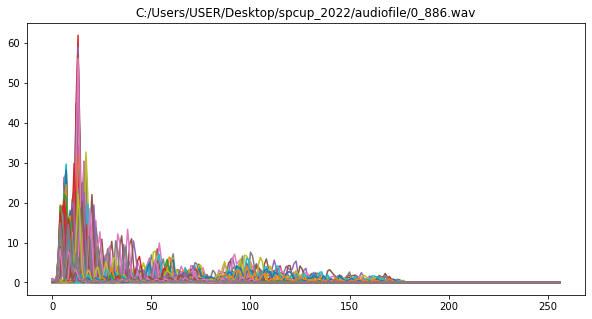

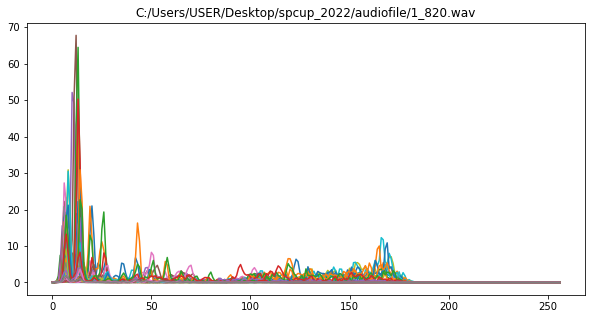

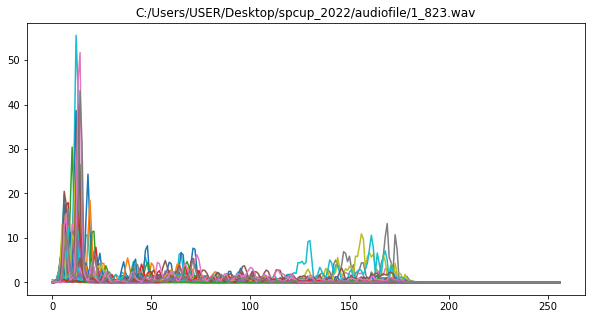

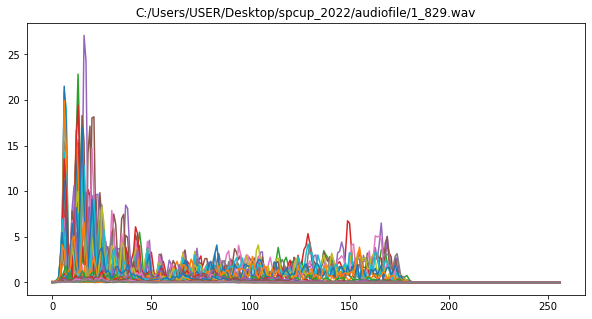

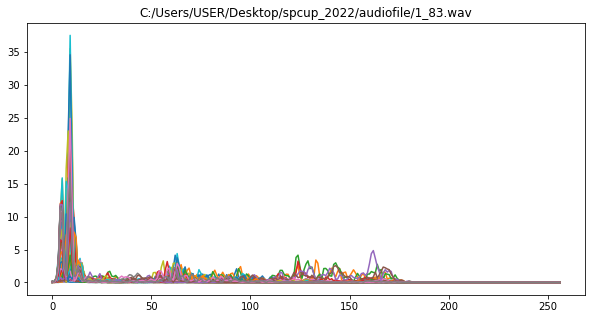

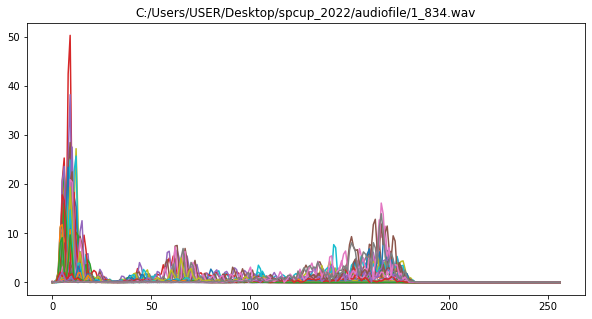

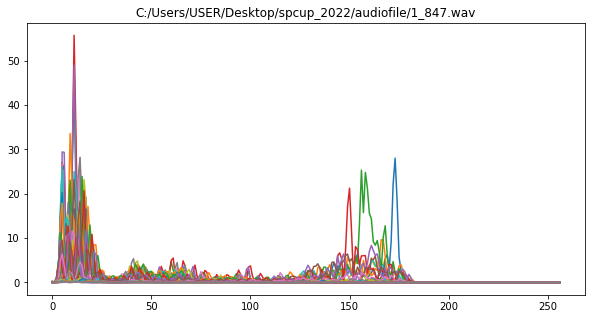

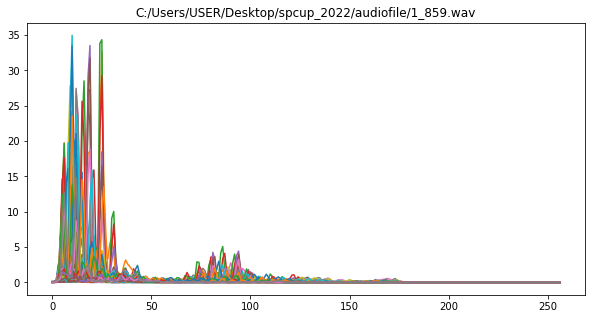

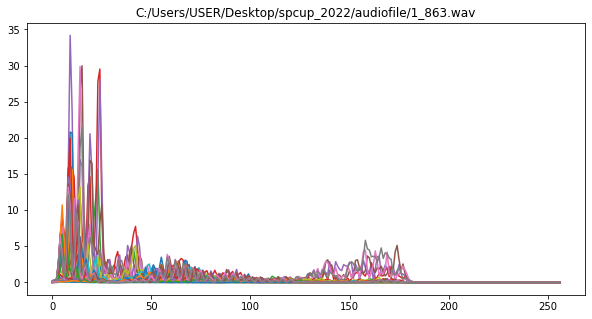

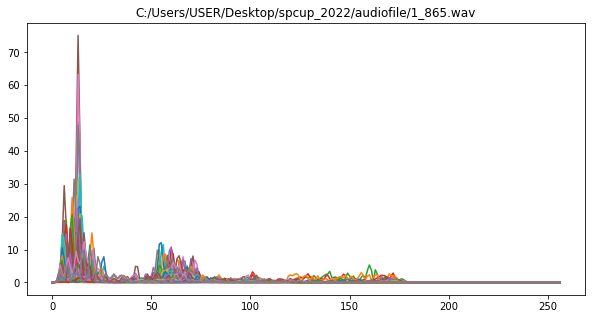

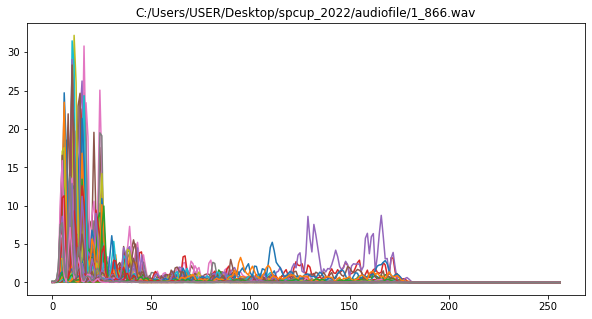

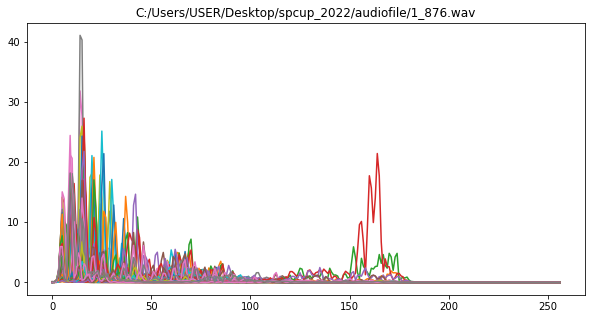

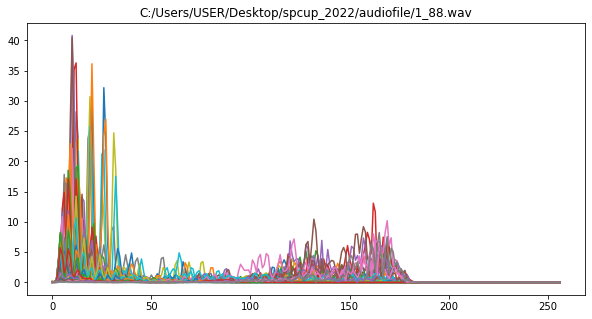

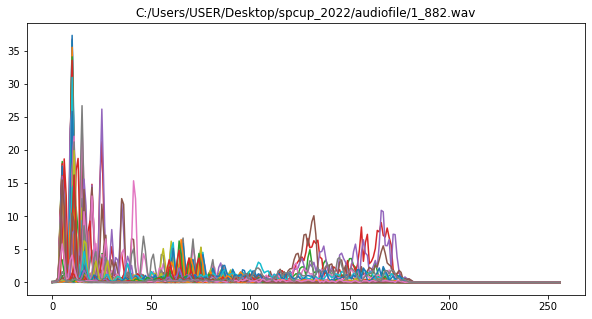

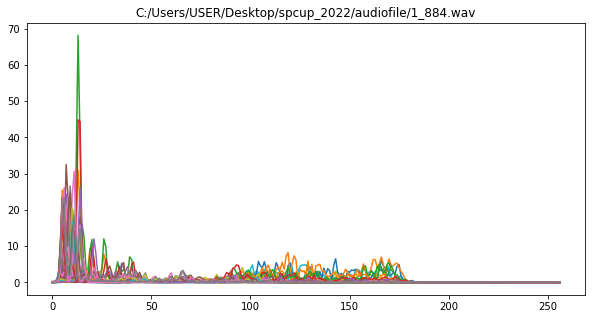

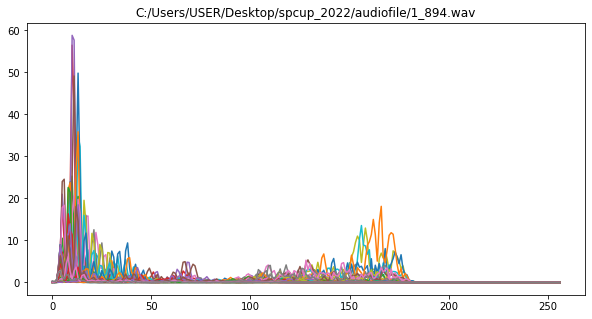

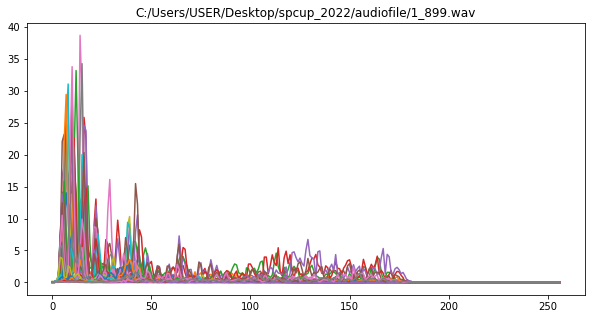

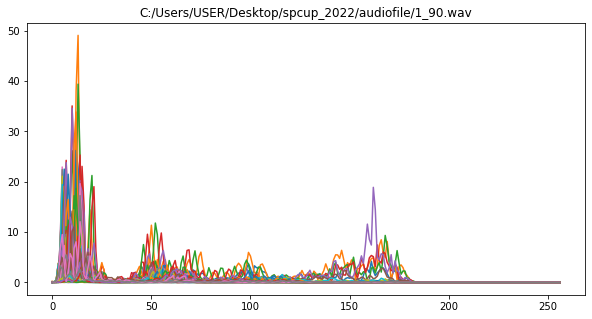

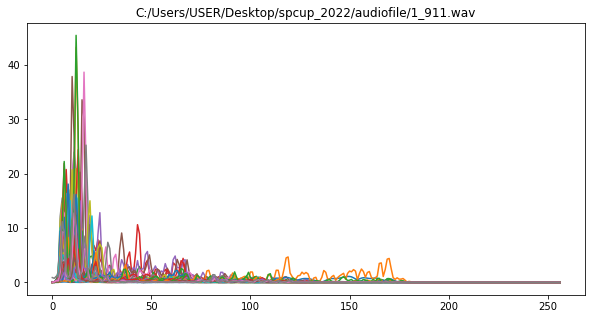

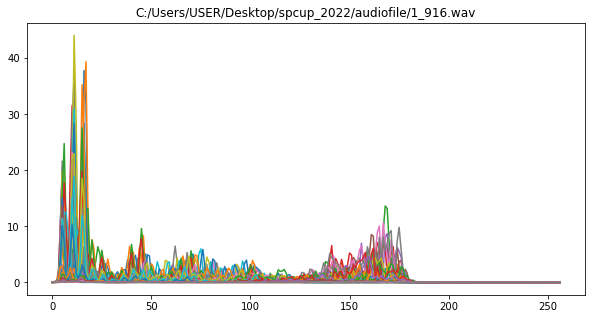

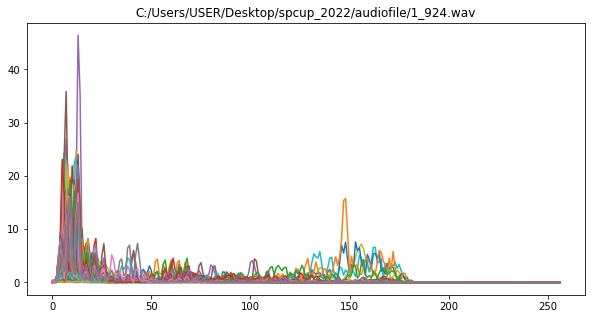

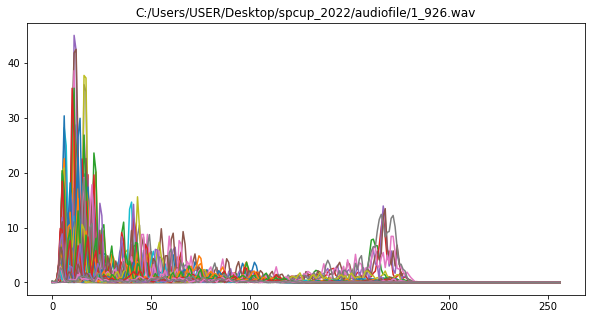

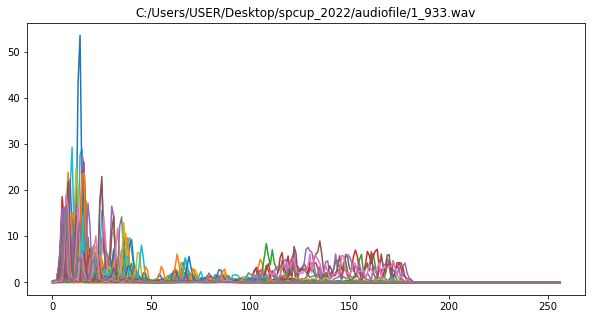

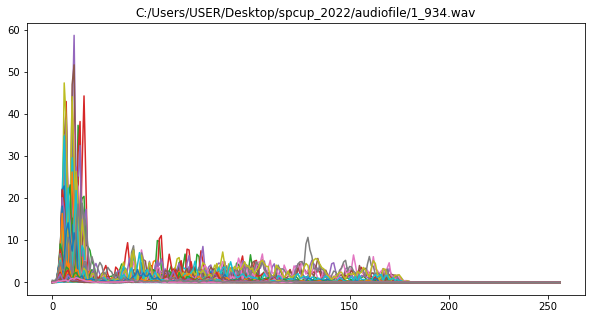

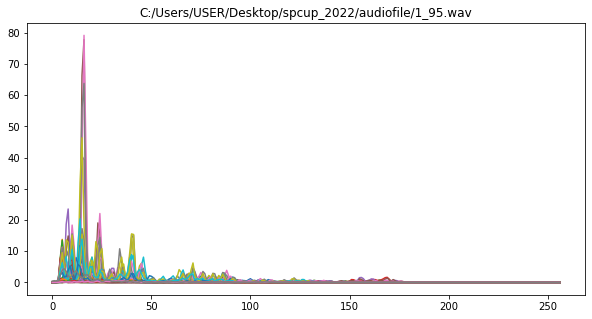

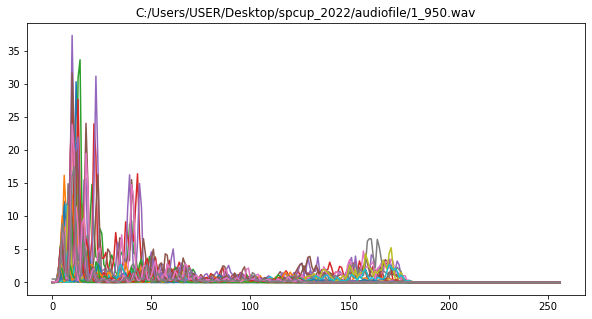

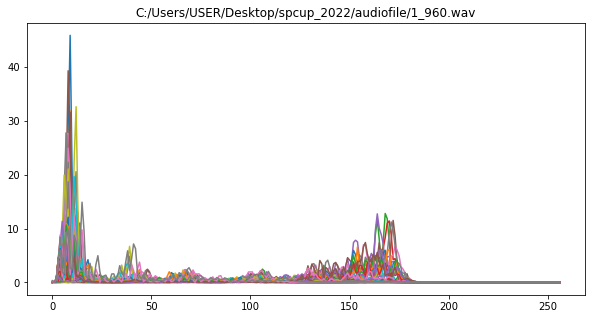

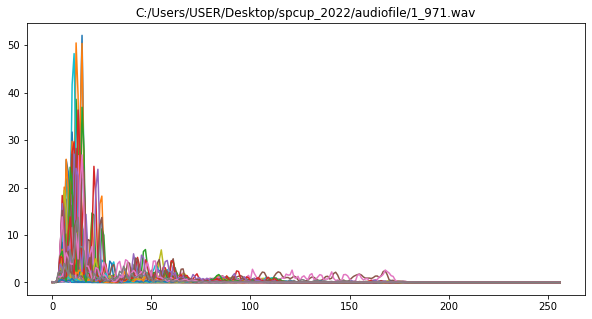

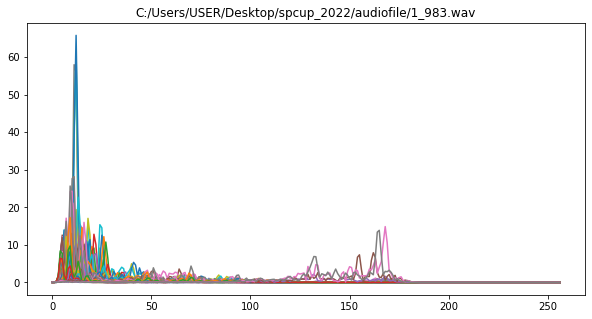

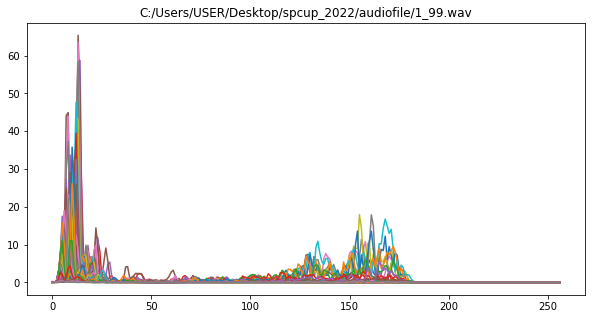

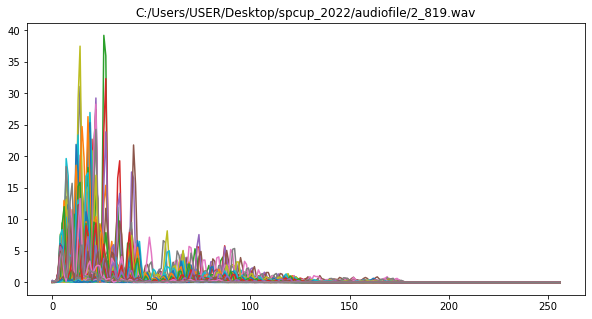

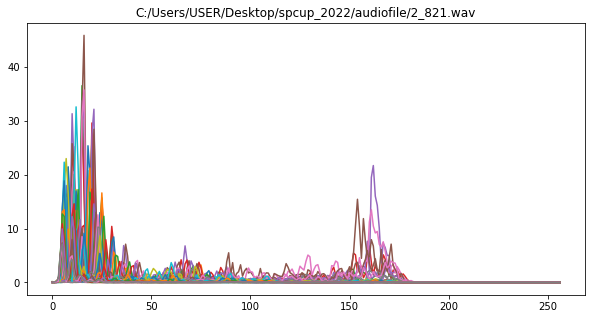

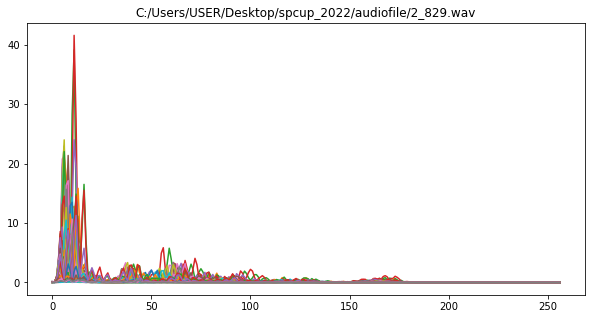

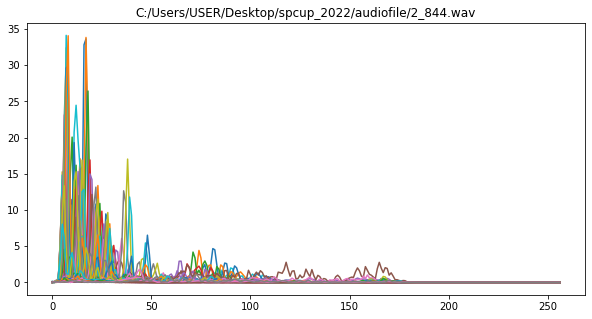

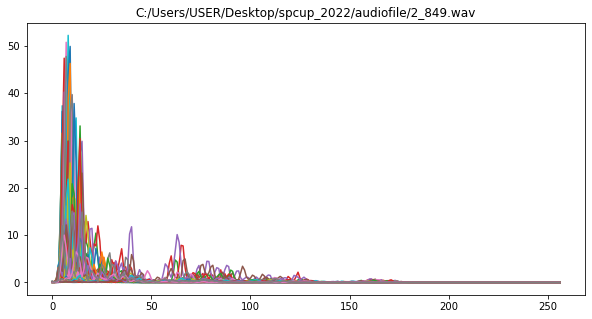

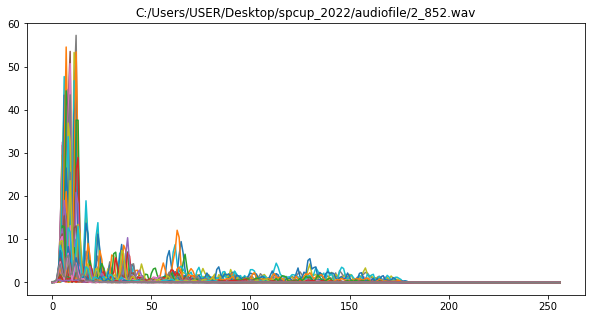

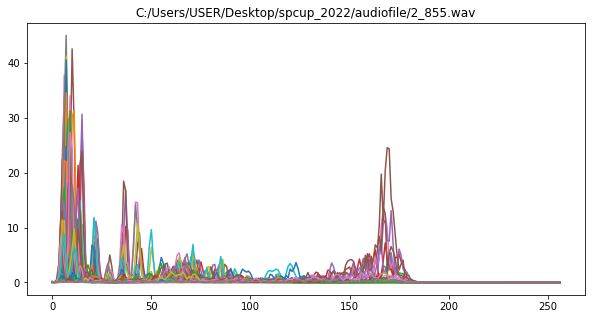

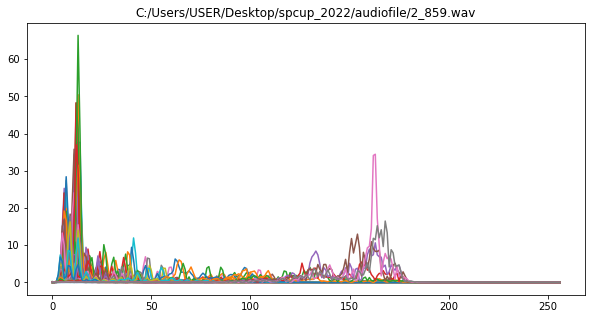

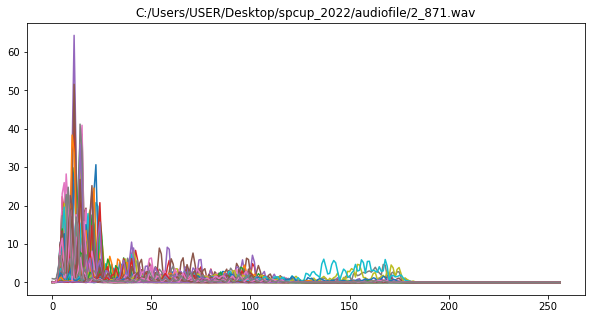

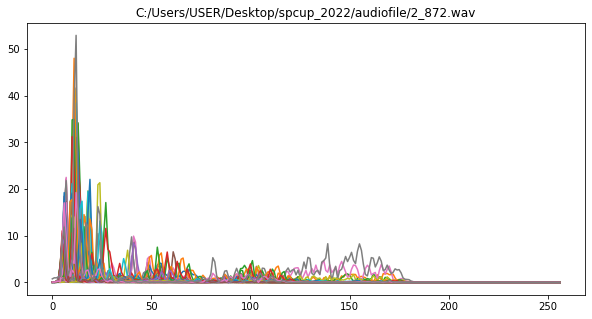

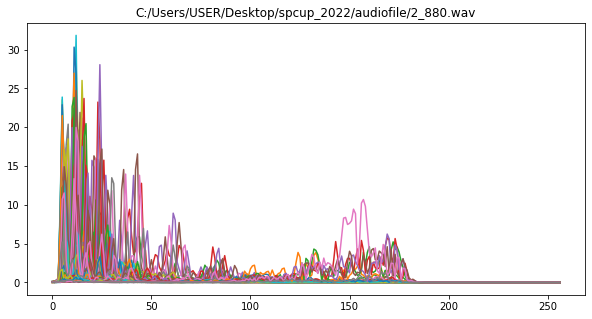

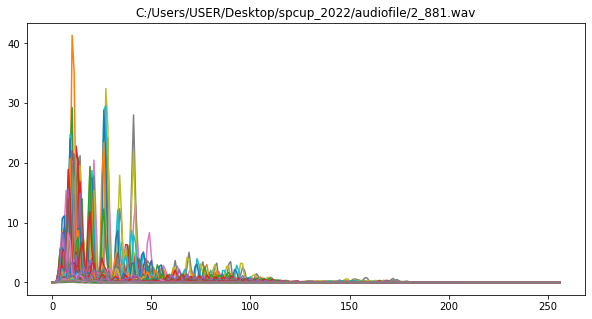

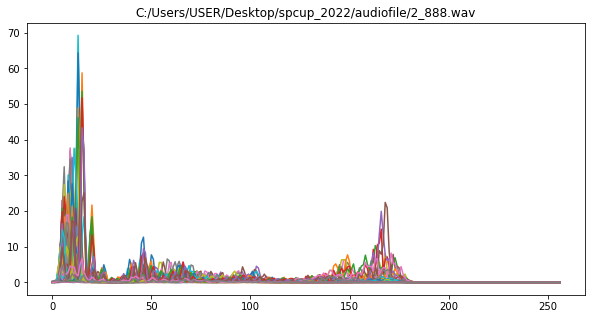

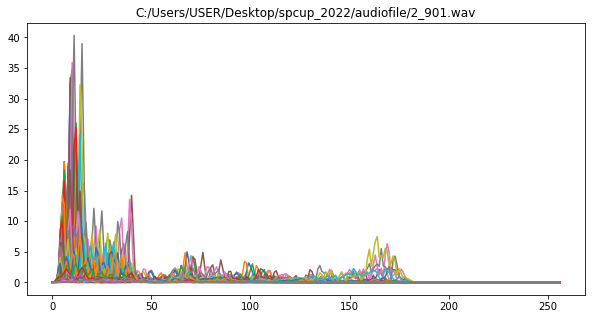

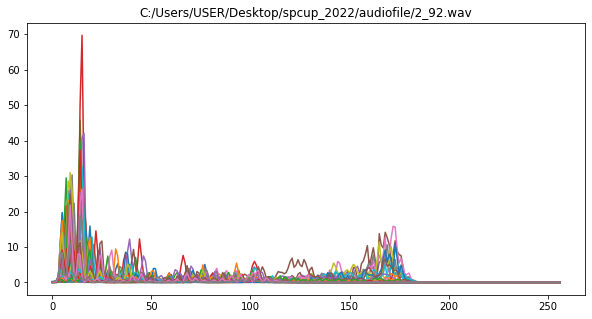

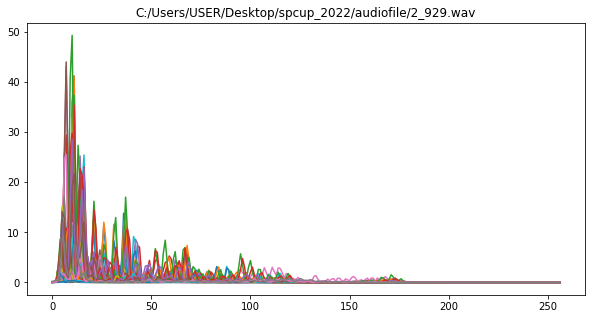

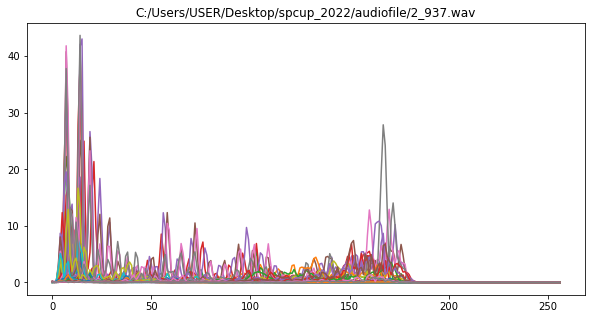

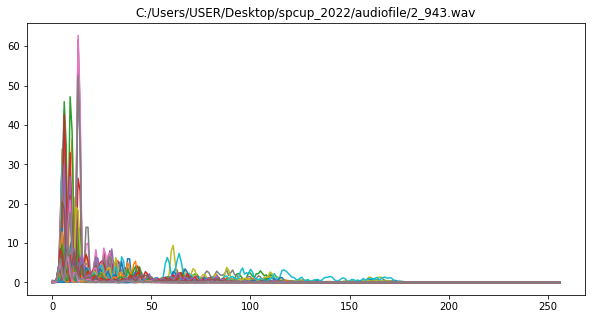

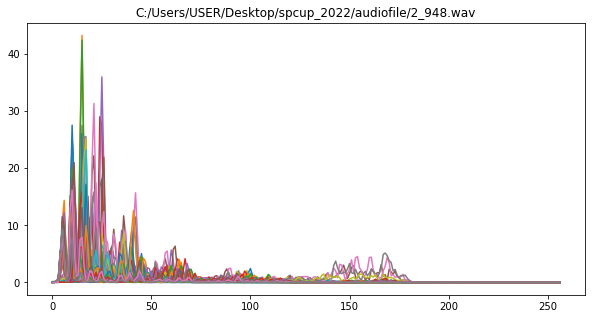

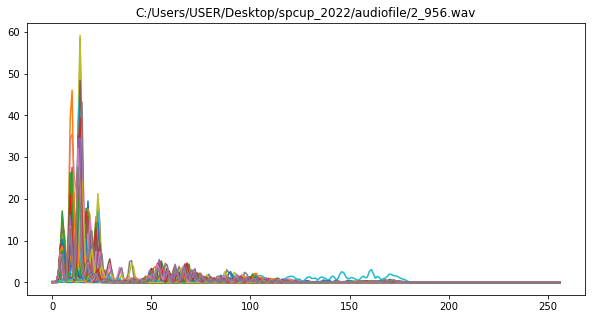

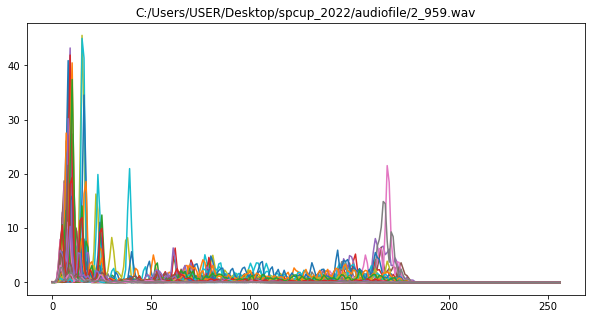

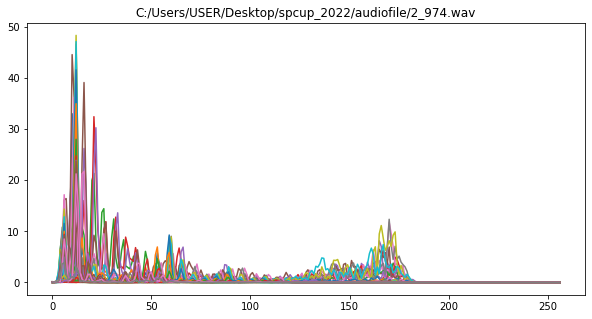

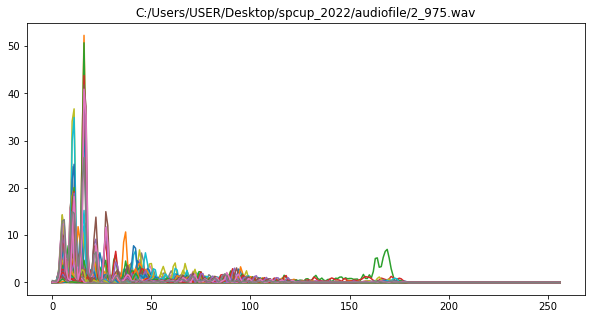

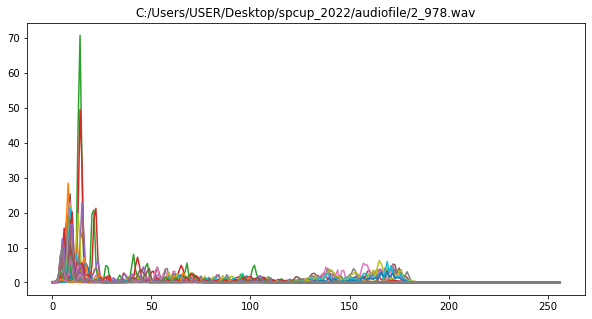

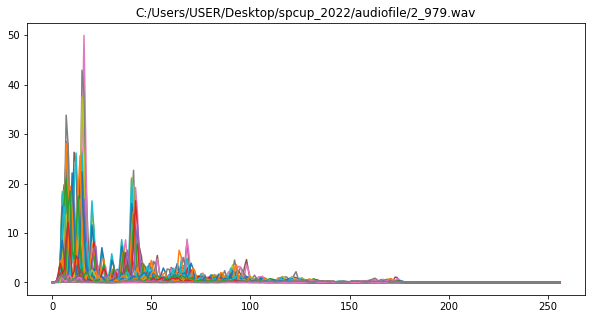

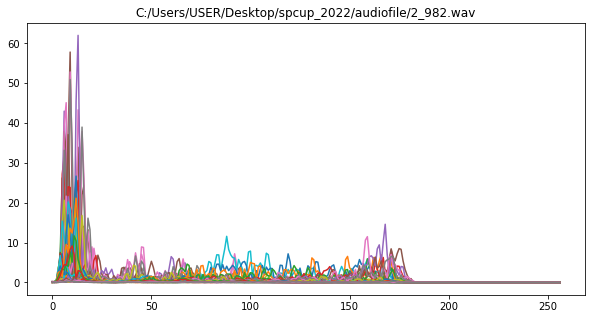

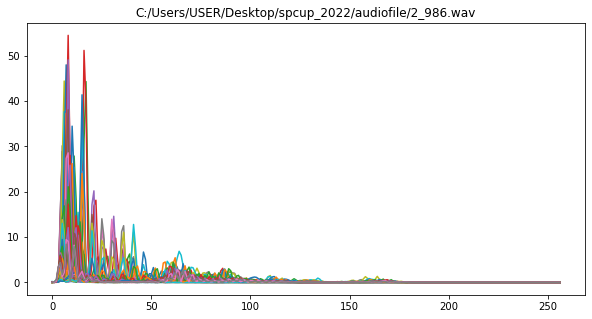

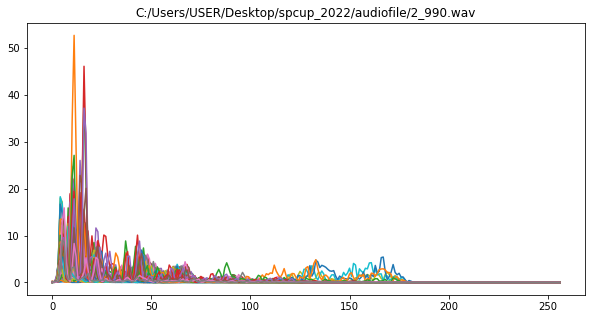

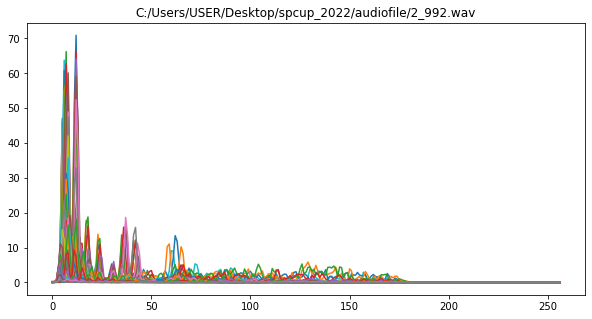

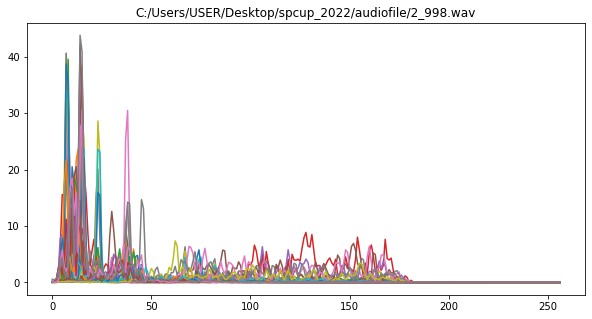

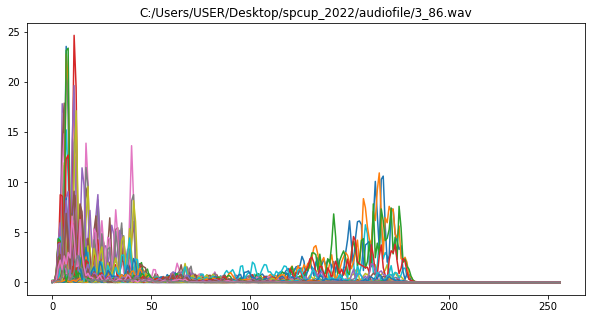

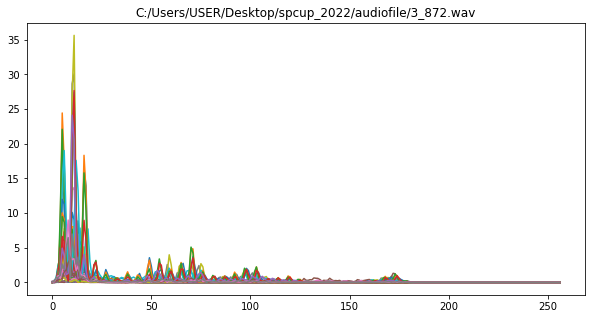

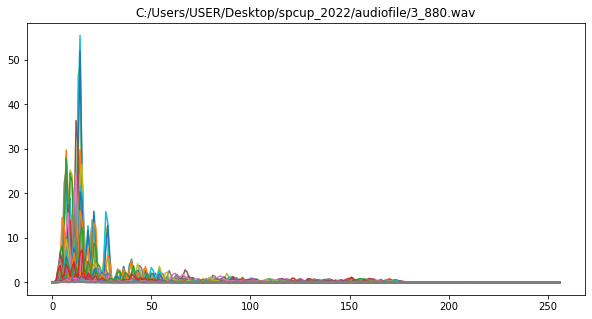

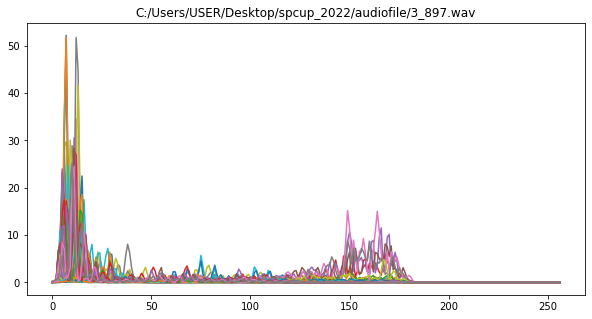

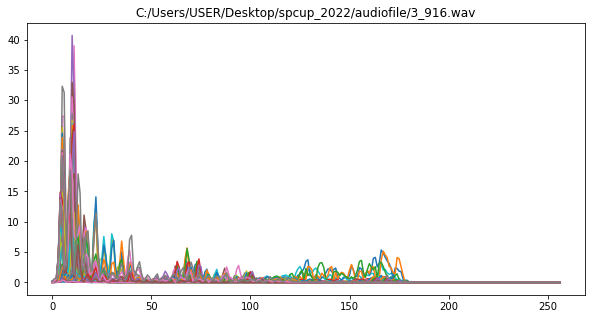

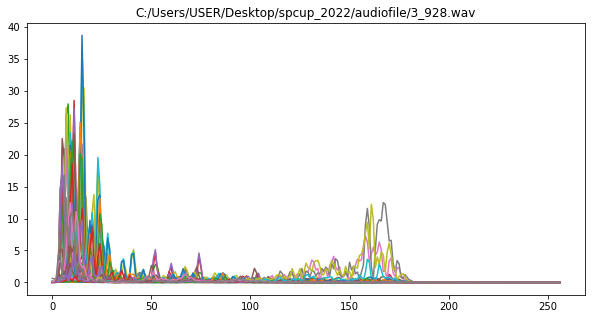

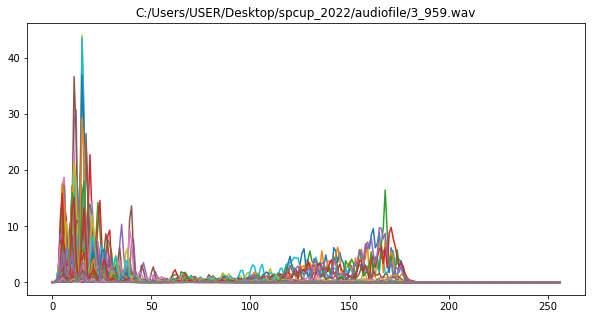

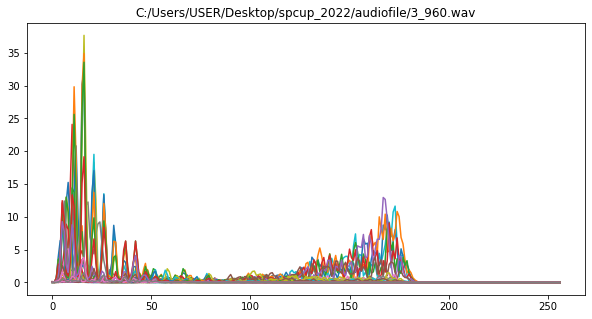

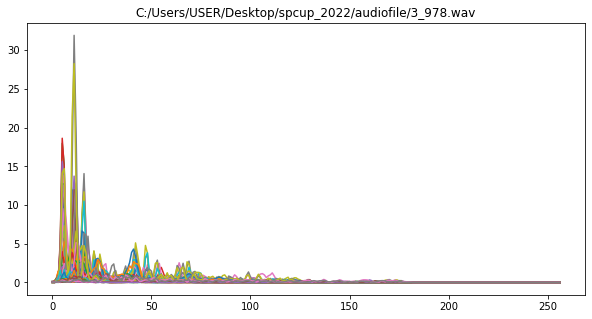

In [84]:
# 잘못 예측한거 plot
for audio in wrong_predictions:
    y, sr = librosa.load(audio, duration=1)  # 모두 1초까지만 자름
    stft = np.abs(librosa.stft(y, n_fft=512, hop_length=384))   # 일반적으로 1/4 가량 겹치게 함
    spectogram = np.abs(stft)
    plt.figure(figsize=(10,5))
    plt.title(audio)
    plt.plot(spectogram) 

In [112]:
# 잘못 예측한 오디오 파일들 모은 폴더 생성
import shutil
import os
 
file_source = 'C:/Users/USER/Desktop/spcup_2022/audiofile/'
file_destination = 'C:/Users/USER/Desktop/wrong_prediction'
 
get_files = os.listdir(file_source)
 

for i in range(len(wrong_predictions)):
    print(wrong_predictions[i][43:])
    for g in get_files:
        if g == wrong_predictions[i][43:]:
            shutil.move(file_source + g, file_destination)

0_886.wav
1_820.wav
1_823.wav
1_829.wav
1_83.wav
1_834.wav
1_847.wav
1_859.wav
1_863.wav
1_865.wav
1_866.wav
1_876.wav
1_88.wav
1_882.wav
1_884.wav
1_894.wav
1_899.wav
1_90.wav
1_911.wav
1_916.wav
1_924.wav
1_926.wav
1_933.wav
1_934.wav
1_95.wav
1_950.wav
1_960.wav
1_971.wav
1_983.wav
1_99.wav
2_819.wav
2_821.wav
2_829.wav
2_844.wav
2_849.wav
2_852.wav
2_855.wav
2_859.wav
2_871.wav
2_872.wav
2_880.wav
2_881.wav
2_888.wav
2_901.wav
2_92.wav
2_929.wav
2_937.wav
2_943.wav
2_948.wav
2_956.wav
2_959.wav
2_974.wav
2_975.wav
2_978.wav
2_979.wav
2_982.wav
2_986.wav
2_990.wav
2_992.wav
2_998.wav
3_86.wav
3_872.wav
3_880.wav
3_897.wav
3_916.wav
3_928.wav
3_959.wav
3_960.wav
3_978.wav
